![](../docs/banner.png)

# Chapter 5: Introduction to NumPy

## 1. Introduction to NumPy

NumPy stands for "Numerical Python" and it is the standard Python library used for working with arrays (i.e., vectors & matrices), linear algerba, and other numerical computations. NumPy is written in C, making NumPy arrays **faster** and **more memory efficient** than Python lists or arrays, read more: ([link 1](https://www.datadiscuss.com/proof-that-numpy-is-much-faster-than-normal-python-array/), [link 2](https://www.jessicayung.com/numpy-arrays-memory-and-strides/), [link 3](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)).

NumPy can be installed using `conda` (if not already):

```
conda install numpy
```

![image.png](attachment:image.png)

## 2. NumPy Arrays

### What are Arrays?

Arrays are "n-dimensional" data structures that can contain all the basic Python data types, e.g., floats, integers, strings etc, but work best with numeric data. NumPy arrays ("ndarrays") are homogenous, which means that items in the array should be of the same type. ndarrays are also compatible with numpy's vast collection of in-built functions!

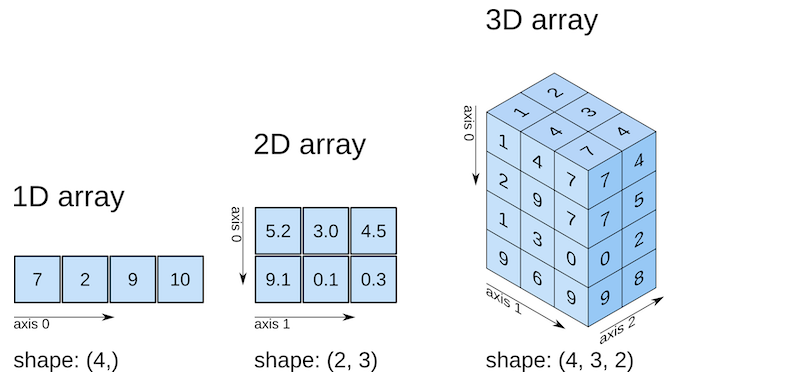

Source: [Medium.com](https://medium.com/hackernoon/10-machine-learning-data-science-and-deep-learning-courses-for-programmers-7edc56078cde)

Usually we import numpy with the alias `np` (to avoid having to type out n-u-m-p-y every time we want to use it):

In [ ]:
import numpy as np

A numpy array is sort of like a list:

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_list

In [ ]:
my_array = np.array([1, 2, 3, 4, 5])
my_array

But it has the type `ndarray`:

In [ ]:
type(my_array)

Unlike a list, arrays can only hold a single type (usually numbers):

In [ ]:
my_list = [1, "hi"]
my_list

In [ ]:
my_array = np.array(([1.5], "hi"))
my_array

Above: NumPy converted the integer `1` into the string `'1'`!

### Creating arrays

ndarrays are typically created using two main methods:
1. From existing data (usually lists or tuples) using `np.array()`, like we saw above; or,
2. Using built-in functions such as `np.arange()`, `np.linspace()`, `np.zeros()`, etc.

In [ ]:
my_list = [1, 2, 3]
np.array(my_list)

Just like you can have "multi-dimensional lists" (by nesting lists in lists), you can have multi-dimensional arrays (indicated by double square brackets `[[ ]]`):

In [ ]:
list_2d = [[1, 2], [3, 4], [5, 6]]
list_2d

In [ ]:
array_2d = np.array(list_2d)
array_2d

You'll probably use the built-in numpy array creators quite often. Here are some common ones (hint - don't forget to check the docstrings for help with these functions, if you're in Jupyter, remeber the `shift + tab` shortcut):

In [ ]:
np.arange(1, 7)  # from 1 inclusive to 5 exclusive

In [ ]:
np.arange(0, 11, 2)  # step by 2 from 1 to 11

In [ ]:
np.linspace(0, 10, 21)  # 5 equally spaced points between 0 and 10

In [ ]:
np.ones((2, 2))  # an array of ones with size 2 x 2

In [ ]:
a = np.zeros((2,3))  # an array of zeros with size 2 x 3

In [ ]:
np.ones_like(a)

In [ ]:
np.full((3, 3), 3.14)  # an array of the number 3.14 with size 3 x 3

In [ ]:
np.full((3, 3, 3), 3.14)  # an array of the number 3.14 with size 3 x 3 x 3

In [ ]:
np.random.rand(5, 2)  # random numbers uniformly distributed from 0 to 1 with size 5 x 2

There are many useful attributes/methods that can be called off numpy arrays:

In [ ]:
print(dir(np.ndarray))

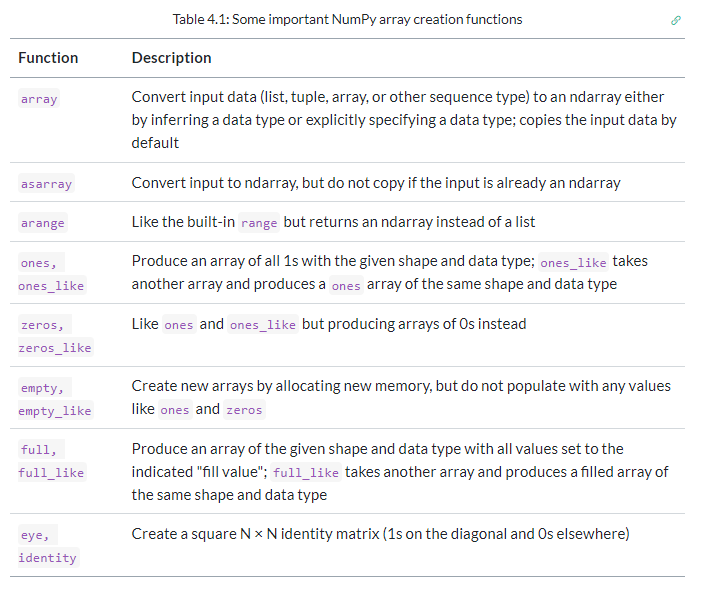

In [ ]:
x = np.random.rand(5, 2)
x

In [ ]:
x.transpose()

In [ ]:
x.mean()

In [ ]:
x.astype(int)

### Array Shapes

As you just saw above, arrays can be of any dimension, shape and size you desire. In fact, there are three main array attributes you need to know to work out the characteristics of an array:
- `.ndim`: the number of dimensions of an array
- `.shape`: the number of elements in each dimension (like calling `len()` on each dimension)
- `.size`: the total number of elements in an array (i.e., the product of `.shape`)

In [ ]:
array_1d = np.ones(3)
print(f"Dimensions: {array_1d.ndim}")
print(f"     Shape: {array_1d.shape}")
print(f"      Size: {array_1d.size}")
print(f"      type: {array_1d.dtype}")

Let's turn that print action into a function and try out some other arrays:

In [9]:
def print_array(x):
    print(f"Dimensions: {x.ndim}")
    print(f"     Shape: {x.shape}")
    print(f"      Size: {x.size}")
    print(f"      type: {x.dtype}")
    print("")
    print(x)

In [ ]:
array_2d = np.ones((3, 2))
print_array(array_2d)

In [ ]:
array_4d = np.ones((1, 2, 3, 4))
print_array(array_4d)

After 3 dimensions, printing arrays starts getting pretty messy. As you can see above, the number of square brackets (`[ ]`) in the printed output indicate how many dimensions there are: for example, above, the output starts with 4 square brackets `[[[[` indicative of a 4D array.

### 1-d Arrays

One of the most confusing things about numpy is 1-d arrays (vectors) can have 3 possible shapes!

In [ ]:
x = np.ones(5)
print_array(x)

In [ ]:
y = np.ones((1, 5))
print_array(y)

In [ ]:
z = np.ones((5, 1))
print_array(z)

We can use `np.array_equal()` to determine if two arrays have the same shape and elements:

In [ ]:
np.array_equal(x, x)

In [ ]:
np.array_equal(x, y)

In [ ]:
np.array_equal(x, z)

In [ ]:
np.array_equal(y, z)

The shape of your 1-d arrays can actually have big implications on your mathematical oeprations!

In [ ]:
print(f"x: {x}")
print(f"y: {y}")
print(f"z: {z}")

In [ ]:
x + y  # makes sense

In [ ]:
y + z  # wait, what?

What happened in the cell above is "broadcasting" and we'll discuss it below.

## 3. Array Operations and Broadcasting
<hr>

### Elementwise operations

Elementwise operations refer to operations applied to each element of an array or between the paired elements of two arrays.

In [ ]:
x = np.ones(4)
x

In [ ]:
y = x + 1
y

In [ ]:
x - y

In [ ]:
x == y

In [ ]:
x * y

In [ ]:
x ** y

In [ ]:
x / y

In [ ]:
np.array_equal(x, y)

### Broadcasting

ndarrays with different sizes cannot be directly used in arithmetic operations:

In [ ]:
a = np.ones((2, 2))
b = np.ones((4, 4))
a + b

`Broadcasting` describes how NumPy treats arrays with different shapes during arithmetic operations. The idea is to wrangle data so that operations can occur element-wise.

Let's see an example. Say I sell pies on my weekends. I sell 3 types of pies at different prices, and I sold the following number of each pie last weekend. I want to know how much money I made per pie type per day.

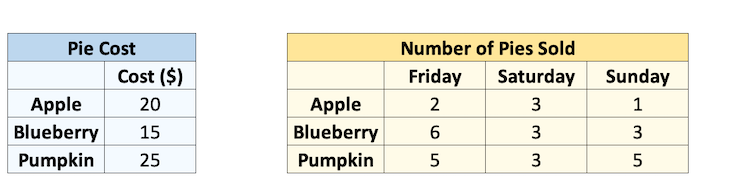

In [ ]:
cost = np.array([20, 15, 25])
print("Pie cost:")
print(cost)
sales = np.array([[2, 3, 1], [6, 3, 3], [5, 3, 5]])
print("\nPie sales (#):")
print(sales)

How can we multiply these two arrays together? We could use a loop:

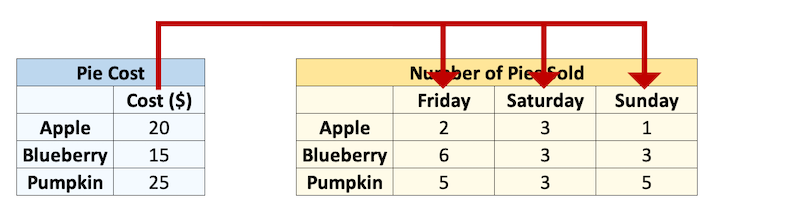

In [ ]:
total = np.zeros((3, 3))  # initialize an array of 0's
for col in range(sales.shape[1]):
    total[:, col] = sales[:, col] * cost
total

Or we could make them the same size, and multiply corresponding elements "elementwise":

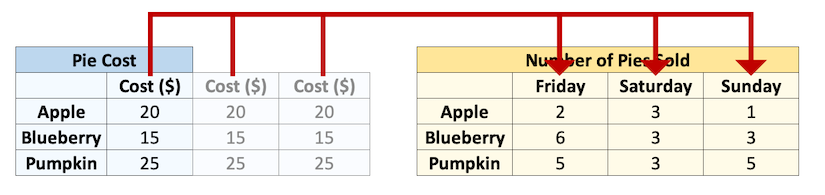

In [ ]:
cost = np.repeat(cost, 3).reshape((3, 3))
cost

In [ ]:
cost * sales

Congratulations! You just broadcasted! Broadcasting is just Numpy eessentially doing the `np.repeat()` for you under the hood:

In [ ]:
cost = np.array([20, 15, 25]).reshape(3, 1)
print(f" cost shape: {cost.shape}")
sales = np.array([[2, 3, 1], [6, 3, 3], [5, 3, 5]])
print(f"sales shape: {sales.shape}")

In [ ]:
sales * cost

In NumPy the smaller array is “broadcast” across the larger array so that they have compatible shapes:

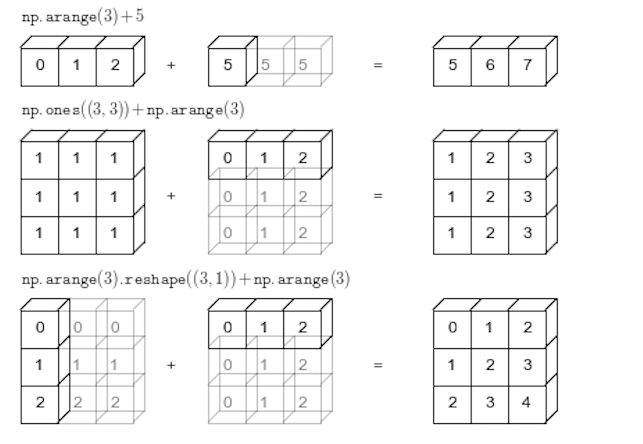

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

* they are equal, or

* one of them is 1.

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes.

Source: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas (2016)

Why should you care about broadcasting? Well, it's cleaner and faster than looping and it also affects the array shapes resulting from arithmetic operations. Below, we can time how long it takes to loop vs broadcast:

In [ ]:
cost = np.array([20, 15, 25]).reshape(3, 1)
sales = np.array([[2, 3, 1],
                  [6, 3, 3],
                  [5, 3, 5]])
total = np.zeros((3, 3))

time_loop = %timeit -q -o -r 3 for col in range(sales.shape[1]): total[:, col] = sales[:, col] * np.squeeze(cost)
time_vec = %timeit -q -o -r 3 cost * sales
print(f"Broadcasting is {time_loop.average / time_vec.average:.2f}x faster than looping here.")

### Reshaping Arrays

There are 3 key reshaping methods I want you to know about for reshaping numpy arrays:
- `.rehshape()`
- `np.newaxis`
- `.flatten()`

In [1]:
import numpy as np

In [2]:
x = np.full((4, 3), 3.14)
x

array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]])

You'll reshape arrays farily often and the `.reshape()` method is pretty intuitive:

In [4]:
x.reshape(6, 2)

array([[3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14]])

In [7]:
x.reshape(6, -1)  # using -1 will calculate the dimension for you (if possible)

array([[3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14],
       [3.14, 3.14]])

In [10]:
a = np.ones(3)
print_array(a)
b = np.ones((3, 2))
print_array(b)

Dimensions: 1
     Shape: (3,)
      Size: 3
      type: float64

[1. 1. 1.]
Dimensions: 2
     Shape: (3, 2)
      Size: 6
      type: float64

[[1. 1.]
 [1. 1.]
 [1. 1.]]


If I want to add these two arrays I won't be able to because their dimensions are not compatible:

In [11]:
a + b

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

Sometimes you'll want to add dimensions to an array for broadcasting purposes like this. We can do that with `np.newaxis` (note that `None` is an alias for `np.newaxis`). We can add a dimension to `a` to make the arrays compatible:

In [13]:
print_array(a[:, np.newaxis])  # same as a[:, None]

Dimensions: 2
     Shape: (3, 1)
      Size: 3
      type: float64

[[1.]
 [1.]
 [1.]]


In [14]:
a[:, np.newaxis] + b

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

Finally, sometimes you'll want to "flatten" arrays to a single dimension using `.ravel()` or `.flatten()`. `.flatten()` used to return a copy and `.ravel()` a view/reference but now they both return a copy so I can't think of an important reason to use one over the other 🤷‍♂️

In [15]:
x

array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]])

In [16]:
print_array(x.flatten())

Dimensions: 1
     Shape: (12,)
      Size: 12
      type: float64

[3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14 3.14]


## 4. Indexing and slicing
<hr>

Concepts of indexing should be pretty familiar by now. Indexing arrays is similar to indexing lists but there are just more dimensions.

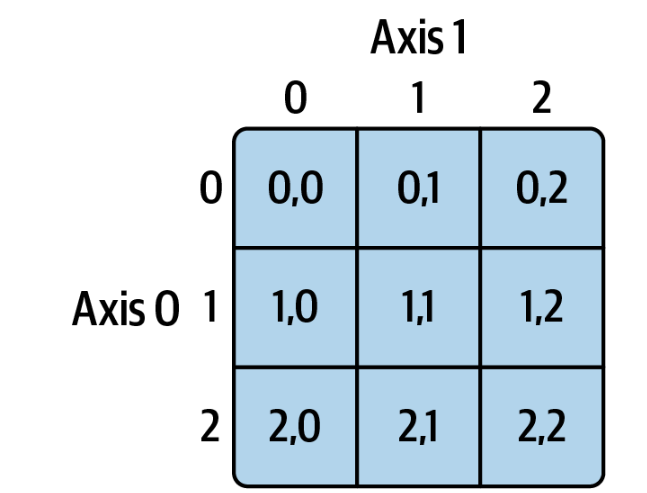

### Numeric Indexing

In [17]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x[3]

3

In [19]:
x[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
x[:4]

array([0, 1, 2, 3])

In [21]:
x[2:5]

array([2, 3, 4])

In [22]:
x[2:3]

array([2])

In [23]:
x[-1]

9

In [24]:
x[-2]

8

In [28]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For 2D arrays:

In [33]:
x = np.random.randint(10, size=(4, 6))
x

array([[9, 1, 3, 9, 3, 9],
       [7, 4, 1, 5, 8, 9],
       [6, 5, 0, 4, 9, 3],
       [7, 4, 8, 9, 3, 7]])

In [34]:
x[3, 4]  # do this

3

In [36]:
x[3][4]  # i do not like this as much

array([7, 4, 8, 9, 3, 7])

In [37]:
x[3]

array([7, 4, 8, 9, 3, 7])

In [38]:
len(x) # generally, just confusing

4

In [39]:
x.shape

(4, 6)

In [42]:
x[:, 2]  # column number 2

array([3, 1, 0, 8])

In [43]:
x[2:, :3]

array([[6, 5, 0],
       [7, 4, 8]])

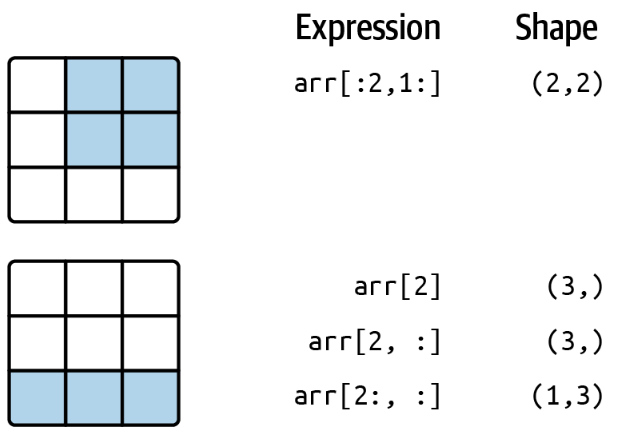
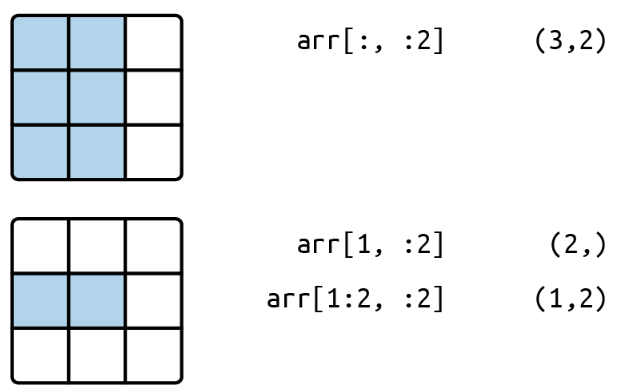

In [ ]:
x.T

In [44]:
x

array([[9, 1, 3, 9, 3, 9],
       [7, 4, 1, 5, 8, 9],
       [6, 5, 0, 4, 9, 3],
       [7, 4, 8, 9, 3, 7]])

In [45]:
x[1, 1] = 555555
x

array([[     9,      1,      3,      9,      3,      9],
       [     7, 555555,      1,      5,      8,      9],
       [     6,      5,      0,      4,      9,      3],
       [     7,      4,      8,      9,      3,      7]])

In [46]:
z = np.zeros(6)
z

array([0., 0., 0., 0., 0., 0.])

In [47]:
x[0] = z
x

array([[     0,      0,      0,      0,      0,      0],
       [     7, 555555,      1,      5,      8,      9],
       [     6,      5,      0,      4,      9,      3],
       [     7,      4,      8,      9,      3,      7]])

### Boolean Indexing

In [48]:
x = np.random.rand(10)
x

array([0.18360092, 0.88544259, 0.47520372, 0.54641105, 0.81507952,
       0.18725215, 0.18236883, 0.21641709, 0.06024658, 0.08706486])

In [49]:
x + 1

array([1.18360092, 1.88544259, 1.47520372, 1.54641105, 1.81507952,
       1.18725215, 1.18236883, 1.21641709, 1.06024658, 1.08706486])

In [50]:
x_thresh = x > 0.5
x_thresh

array([False,  True, False,  True,  True, False, False, False, False,
       False])

In [53]:
x[x_thresh] = 0.5 # set all elements  > 0.5 to be equal to 0.5
x

array([0.18360092, 0.5       , 0.47520372, 0.5       , 0.5       ,
       0.18725215, 0.18236883, 0.21641709, 0.06024658, 0.08706486])

In [54]:
x = np.random.rand(10)
x

array([0.30886571, 0.68508678, 0.28703385, 0.2217338 , 0.02327183,
       0.68837626, 0.16898545, 0.5095614 , 0.43139765, 0.6316798 ])

In [55]:
x[x > 0.5] = 0.5
x

array([0.30886571, 0.5       , 0.28703385, 0.2217338 , 0.02327183,
       0.5       , 0.16898545, 0.5       , 0.43139765, 0.5       ])

In [64]:
x = np.random.randint(10, size=(4, 6))
x

array([[9, 6, 5, 8, 3, 2],
       [7, 7, 3, 3, 2, 8],
       [2, 2, 2, 8, 9, 3],
       [3, 9, 5, 5, 1, 7]])

In [59]:
x > 5

array([[ True, False, False,  True, False, False],
       [False,  True,  True,  True, False, False],
       [ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True,  True]])

In [65]:
x[x>5] = 

array([9, 6, 8, 7, 7, 8, 8, 9, 9, 7])